At Capital One, you'll almost always be working with a diverse team, often including business analysts, engineers, product managers, and senior leaders. The ability to not just complete data science work, but also to explain and present your work is important.
With that in mind, please deliver your answers as if you were handing off work to another data scientist joining your team. Tying together your intent, code, analysis and results is the goal.
The following artifacts are valued:
explanations of your intent, methods, conclusions and any assumptions
clear, documented, and well-structured code
instructions for running your code
methods you attempted that didn't work
ideas you didn't have time to complete but would have done with more time
a thorough write up with any pertinent visualizations
We ask that any code written by others is sourced/cited appropriately. We are excited to review your work and your interpretation of the data.

Data Science Challenge: Card Transactions!

This coding and analysis challenge is designed to test your skill and intuition analyzing real[-ish] world data. For the challenge, we will use credit card transactions data. Note that this dataset loosely resembles real transactional data from Capital One credit card customers, but the entities and relations within are purely fictional. No persons, places, or things lost their identity in the making of this dataset.
Required Questions: Please answer completely all four required questions.

## Question 1: Load
- Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here
- Please describe the structure of the data. Number of records and fields in each record?
- Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

1(a) Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here

In [764]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
jsonReader = pd.read_json('transactions.txt',lines=True,chunksize=50000)
df = next(jsonReader)

In [765]:
df['transactionDateTime'] = pd.to_datetime(df.transactionDateTime)
df.iloc[0]

accountNumber                         737265056
customerId                            737265056
creditLimit                                5000
availableMoney                             5000
transactionDateTime         2016-08-13 14:27:32
transactionAmount                         98.55
merchantName                               Uber
acqCountry                                   US
merchantCountryCode                          US
posEntryMode                                 02
posConditionCode                             01
merchantCategoryCode                  rideshare
currentExpDate                          06/2023
accountOpenDate                      2015-03-14
dateOfLastAddressChange              2015-03-14
cardCVV                                     414
enteredCVV                                  414
cardLast4Digits                            1803
transactionType                        PURCHASE
echoBuffer                                     
currentBalance                          

1(b) Please describe the structure of the data. Number of records and fields in each record?

1(c) Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

Below are the statistics across the entire dataset. Note that the means are skewed just by the range of customers

In [ ]:
df.describe()

       accountNumber    customerId   creditLimit  availableMoney  \
count   5.000000e+04  5.000000e+04  50000.000000    50000.000000   
mean    5.355273e+08  5.355273e+08   9708.655000     5849.056806   
std     2.433660e+08  2.433660e+08  10611.480171     8850.203442   
min     1.013807e+08  1.013807e+08    250.000000     -793.620000   
25%     3.825957e+08  3.825957e+08   5000.000000      981.140000   
50%     4.489626e+08  4.489626e+08   5000.000000     2852.690000   
75%     7.452174e+08  7.452174e+08  15000.000000     7005.870000   
max     9.963628e+08  9.963628e+08  50000.000000    50000.000000   

       transactionAmount       cardCVV    enteredCVV  cardLast4Digits  \
count       50000.000000  50000.000000  50000.000000     50000.000000   
mean          137.208715    496.126380    496.017860      4384.211720   
std           148.040037    275.432567    275.386515      2614.410113   
min             0.000000    101.000000      3.000000         0.000000   
25%            33.8000

## Question 2: Plot
- Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
- Report any structure you find and any hypotheses you have about that structure.


Below is a histogram of transaction amounts


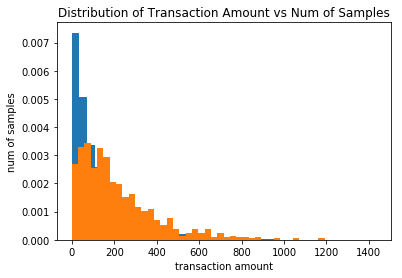

In [773]:
plt.hist(df[df.isFraud==False].transactionAmount,bins=40,label='not Fraud',density=True)
plt.hist(df[df.isFraud==True].transactionAmount,bins=40,label='isFraud',density=True)
plt.title("Distribution of Transaction Amount vs Num of Samples")
plt.ylabel("num of samples")
plt.xlabel("transaction amount")
plt.legend()
plt.show()

## Question 3: Data Wrangling - Duplicate Transactions
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.
- Can you programmatically identify reversed and multi-swipe transactions?
- What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
- Did you find anything interesting about either kind of transaction?


Questions about dataset:
ask abotu 'duplicate transactions', 
why is available money unchanging for some people, how far aprt does a tx have to be in order for it not to be a duplicate


In [368]:
"""
There are four different types of transaction types:
address verification, purchase, and reversal
"""
np.unique(df.transactionType)

array(['', 'ADDRESS_VERIFICATION', 'PURCHASE', 'REVERSAL'], dtype=object)

In [277]:
import scripts.utils as utils
imp.reload(utils)
# First start with one account, look at account with highest number of txs
accts, counts = np.unique(df['accountNumber'],return_counts=True)

# Subselect the account with highest activity, and sort by transaction
acctIdMostTransactions = accts[np.argmax(counts)]

"""
with respect to detecting reverse transactions,
the only way to predict them were if the transaction amount
is the same
"""
duplicateTxs = utils.predictDuplicateByUser(df,acctIdMostTransactions)


## Question 4: Model
Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.
- Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).
- Provide an estimate of performance using an appropriate sample, and show your work.
- Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)
Thank you very much for your efforts! We look forward to reviewing your insights!

- "credit card skimmers" if one pos had significant # of fraudulent txs consider looking at it
- engineered feature of time between last transaction?


In [714]:
"""
Data preloading
"""
import scripts.utils as utils
imp.reload(utils)

# this iterates through each
allUserTxsDf = utils.calculateUser(df)
allUserTxsDf = utils.encodeColumn(allUserTxsDf)
allUserTxsDf = utils.encodeColumn(allUserTxsDf,col='merchantCategoryCode')
balancedDf = utils.upsampleMinority(allUserTxsDf)

In [ ]:
"""
Implementing autoencoder model
"""

import autoencoder as ae
imp.reload(ae)

aeModel = ae.Autoencoder()

In [716]:

import scripts.Dataset as dataset
imp.reload(dataset)
print("Dataset unbalanced")
print(allUserTxsDf.isFraud.value_counts())
print("\nDataset balanced")
print(balancedDf.isFraud.value_counts())
train_df,test_df = train_test_split(balancedDf,test_size=0.25, random_state=10)
trainDataset = dataset.DfDataset(train_df)
testDataset = dataset.DfDataset(test_df)
train_dataset_loader = torch.utils.data.DataLoader(dataset=trainDataset,
                                             batch_size=1,
                                             shuffle=False)
test_dataset_loader = torch.utils.data.DataLoader(dataset=testDataset,
                                             batch_size=1,
                                             shuffle=False)


Dataset unbalanced
False    49317
True       683
Name: isFraud, dtype: int64

Dataset balanced
True     49317
False    49317
Name: isFraud, dtype: int64


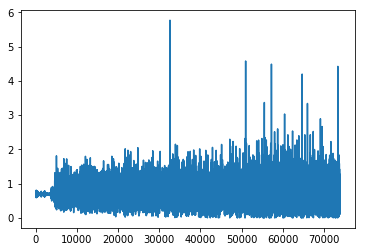

In [741]:
"""
Implementing a CNN model
"""

import scripts.models as m
import torch
import numpy as np
torch.manual_seed(0)
np.random.seed(0)
imp.reload(m)
cnnModel = m.Net()
optimizer = optim.Adam(cnnModel.parameters(), lr=0.001)
costs = []
for epoch in range(1):
    for i, (data, labels) in enumerate(train_dataset_loader):
        optimizer.zero_grad()
        output = cnnModel(data)
        loss = F.binary_cross_entropy(output, labels)
        loss.backward()
        optimizer.step()
        if(i%1000 == 0): print(loss)
        costs.append(loss.item())
        pass
    pass


In [719]:
result = []
yHats =[]
gts = []
for i, (data, labels) in enumerate(test_dataset_loader):
    optimizer.zero_grad()
    output = cnnModel(data)
    yHats.append(output[0].detach())
    gts.append(labels[0].detach())    
    loss = F.binary_cross_entropy(output, labels)
    loss.backward()
    optimizer.step()
    result.append(loss.item())

print("mean cross entropy on test dataset: {}".format(np.mean(result)))

mean cross entropy on test dataset: 0.6487066132657661


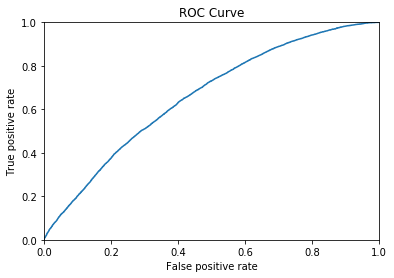

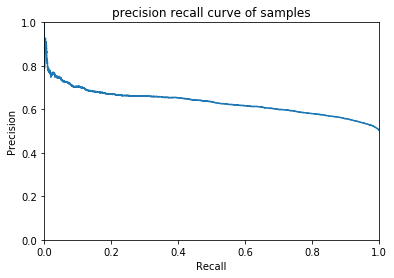

In [784]:
from sklearn.metrics import precision_recall_curve,auc,\
    confusion_matrix,precision_score,accuracy_score, roc_curve

yHats = (np.array(yHats))
gts = (np.array(gts))
precision, recall, thresholds = precision_recall_curve(gts, yHats)
fpr,tpr, _ = roc_curve(gts, yHats)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

plt.plot(recall,precision)
plt.title("precision recall curve of samples")
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

In [782]:
print("labels")
print(confusion_matrix(gts,yHats>0.5))
print("auc: {}".format(auc(fpr,tpr)))
print("acc : {}".format(accuracy_score(gts,yHats>0.5)))
print("prec: {}".format(precision_score(gts,yHats>0.5)))

labels
[[6566 5723]
 [3756 8614]]
auc: 0.6597369909652953
acc : 0.6155967395271503
prec: 0.6008230452674898


from sklearn.preprocessing import normalize
normalize(np.array([[0,3],[0,2],[1,1]]),axis=0)




"""
scratchwork below
"""

allUserTxsDf.columns

import scripts.Dataset as dataset
import imp
imp.reload(dataset)
custom_from_csv = dataset.CustomDatasetFromCSV('transactions.txt')
dataset_loader = torch.utils.data.DataLoader(dataset=custom_from_csv,
                                             batch_size=10,
                                             shuffle=False)
cnnModel = Net()
optimizer = optim.SGD(cnnModel.parameters(), lr=0.001)
for i, (data, labels) in enumerate(dataset_loader):
    try:
        optimizer.zero_grad()
        output = cnnModel(datum)
        loss = F.mse_loss(output, labels)
        loss.backward()
        optimizer.step()
        if(i%1000==0): print(loss)
    except RuntimeError:
        print(data.shape)
        print(labels.shape) 


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression

columns = ['availableMoney','creditLimit','transactionAmount','isFraud',
           'transactionDateTime','accountNumber','merchantName']
dataset_df = df.head(10000)
dataset_df = dataset_df[columns]




# creating initial dataframe
merchant_types = np.unique(dataset_df.merchantName)
merchant_df = pd.DataFrame(merchant_types, columns=['merchant_types'])
merchant_df
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
merchant_df['merchant_cat'] = labelencoder.fit_transform(merchant_df['merchant_types'])
dataset_df[dataset_df.isFraud==1].shape
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(merchant_df[['merchant_cat']]).toarray())
# merge with main df and enc_df
transactions_df = dataset_df.drop(columns=['merchantName'])
transactions_df = transactions_df.join(enc_df).fillna(0)
# Separate input features and target
y = transactions_df.isFraud
X = transactions_df.drop('isFraud', axis=1)
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, random_state=0)
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

y[y==True].shape
# separate minority and majority classes
not_fraud = X[X.isFraud==0]
fraud = X[X.isFraud==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])
# check new class counts
upsampled.isFraud.value_counts()

y_train = upsampled.isFraud
X_train = upsampled.drop('isFraud', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)
upsampled_pred_proba = upsampled.predict_proba(X_test)[:,1]

# Checking accuracy
print("acc: {}".format(accuracy_score(y_test, upsampled_pred)))
print("f1:  {}".format(f1_score(y_test, upsampled_pred)))
print("p : {}".format(precision_score(y_test, upsampled_pred)))

precision, recall, thresholds = precision_recall_curve(y_test,
                                                       upsampled_pred_proba)
plt.plot(recall,precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

fraud.shape
"""
now implementation of autoencoder
"""
import scripts.autoencoder as ae
from sklearn.preprocessing import normalize
import torch
import torch.nn.functional as F
import imp
imp.reload(ae)

# normalize( np.array([[0,1],[0,2],[1,3]]),axis=0) 
# aeX = normalize( transactions_df.drop('isFraud', axis=1).values , axis=0 )
aeX = transactions_df.drop('isFraud', axis=1).values 
aeY = transactions_df.isFraud.values
print(aeY[aeY==1].shape)
print(aeX.shape)

modelAe = ae.Autoencoder(200)

t_X = torch.tensor(aeX).float()
num_epochs = 2
learning_rate=0.0001
torch.manual_seed(10)
optimizer = torch.optim.Adam(modelAe.parameters(), lr=learning_rate)


for epoch in range(num_epochs+1):
    for idx in range(npX.shape[0]):
        features = t_X[idx,:]            
        decoded = modelAe(features)
        cost = F.mse_loss(decoded, features)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        # Logginh
        if not idx % 5000:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                   %(epoch+1, num_epochs, idx, 
                     npX.shape[0], cost))
            pass
        pass
    pass
import matplotlib.pyplot as plt
pltRows = np.array(modelAe.encode(t_X).detach())
pltX, pltY = pltRows[:,0],pltRows[:,1]

plt.figure(figsize=(10,10))
# Plot false labels
mask = aeY==False
plt.scatter(pltX[mask],pltY[mask],label='notFraud',s=0.5)
# Plot true labels
mask = aeY==True
plt.scatter(pltX[mask],pltY[mask],label='isFraud',s=1)
plt.legend()
plt.plot()
### Potential paths of exploration:

two potential paths:

use a autoencoder

train encoder to predict label, freeze the encoder 

and use CNN to train

binary representation of number of labels

In [192]:
"""
CNN Implementation
"""
import scripts.utils as utils
cnndf = pd.concat(utils.calculateUser(df.head(10000)))
columns = ['availableMoney','creditLimit','cardPresent','transactionAmount',
           'transactionAmountMedian','encodedTime',
          'transactionAmountMean','hourDelta','transactionAmountStd']
#cnn_df_x = cnndf[columns]
#cnn_df_y = cnndf['isFraud']

